In [2]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression

### Load Country dataframe: 
Assess core features of the Country dataframe, including: 
- Structure & size: One row per country 247 rows × 31 columns; additionally, contains 33 rows for aggregate data (e.g. world, regions, income groupings)
- Understand why there are more rows than countries (A: this is due to 33 aggregregate rows (e.g. High Income countries))

In [3]:
country = pd.DataFrame.from_csv('data/Country.csv', index_col = None)
country.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [4]:
#ID all rows that are aggregated, not one single country (33) 
country[country.CurrencyUnit.isnull()].head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
7,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,CSS,Caribbean small states,Caribbean small states,Caribbean small states,S3,NaN,Caribbean small states aggregate. Includes Ant...,NaN,NaN,S3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,CEB,Central Europe and the Baltics,Central Europe and the Baltics,Central Europe and the Baltics,B8,NaN,Central Europe and the Baltics aggregate.,NaN,NaN,B8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Load & asess 'Series' dataframe (renamed as metrics): 
Assessing the core aspects of this dataframe, including: 
- Structure & size: One row per series/metric, columns provide defintions, units, periodicity sources, etc.; 1345 rows × 20 columns
- Key categories (and sub-categories) of development indicators

In [5]:
metrics = pd.DataFrame.from_csv('data/Series.csv', index_col = None)
metrics.head()

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
0,BN.KLT.DINV.CD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net (BoP, current US$)",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",NaN,NaN,NaN,NaN,NaN,Open
1,BX.KLT.DINV.WD.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (% of GDP)",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,Weighted average,FDI data do not give a complete picture of int...,NaN,Note: Data starting from 2005 are based on the...,"International Monetary Fund, International Fin...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,NaN,NaN,NaN,Open
2,BX.KLT.DINV.CD.WD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (BoP, c...",NaN,Foreign direct investment refers to direct inv...,NaN,Annual,NaN,NaN,Sum,FDI data do not give a complete picture of int...,NaN,Note: Data starting from 2005 are based on the...,"International Monetary Fund, Balance of Paymen...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,NaN,NaN,NaN,Open
3,BM.KLT.DINV.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net outflows (% of ...",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, International Fin...",NaN,NaN,NaN,NaN,NaN,Open
4,BN.TRF.KOGT.CD,Economic Policy & Debt: Balance of payments: C...,"Net capital account (BoP, current US$)",NaN,Net capital account records acquisitions and d...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",NaN,NaN,NaN,NaN,NaN,Open


In [6]:
# Look at the categories included in the series grouping "Topic" 
metrics.IndicatorName[metrics.IndicatorName.str.contains('GDP per capita')]

295                     GDP per capita growth (annual %)
309                        GDP per capita (constant LCU)
389                   GDP per capita (constant 2005 US$)
409                         GDP per capita (current LCU)
410                         GDP per capita (current US$)
493    GDP per capita, PPP (constant 2011 internation...
494        GDP per capita, PPP (current international $)
540    Government expenditure per student, primary (%...
541    Government expenditure per student, secondary ...
542    Government expenditure per student, tertiary (...
Name: IndicatorName, dtype: object

In [7]:
#Highlevel topic categories
splitTopics = metrics.Topic.str.partition(':')
splitTopics.groupby([0,2]).size()
#splitTopics[splitTopics[0].str.contains('Health')].groupby([0,2]).size()

0                          2                                                                          
Economic Policy & Debt      Balance of payments: Capital & financial account                              11
                            Balance of payments: Current account: Balances                                 4
                            Balance of payments: Current account: Goods, services & income                22
                            Balance of payments: Current account: Transfers                                7
                            Balance of payments: Reserves & other items                                    6
                            External debt: Amortization                                                   18
                            External debt: Arrears, reschedulings, etc.                                   22
                            External debt: Commitments                                                     5
                         

Look at all Health metrics to determine best proxy of health --> SP.DYN.LE00.IN : Life expectancy at birth, total (years)

In [17]:
metrics[metrics.Topic.str.contains('Mortality')].head()

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
813,SH.DTH.COMM.ZS,Health: Mortality,"Cause of death, by communicable diseases and m...",NaN,Cause of death refers to the share of all deat...,NaN,Annual,NaN,NaN,Weighted average,The limited availability of data on health sta...,NaN,NaN,Derived based on the data from WHO's World Hea...,Data on cause of death are compiled by the WHO...,NaN,NaN,NaN,NaN,Open
814,SH.DTH.INJR.ZS,Health: Mortality,"Cause of death, by injury (% of total)",NaN,Cause of death refers to the share of all deat...,NaN,Annual,NaN,NaN,Weighted average,The limited availability of data on health sta...,NaN,NaN,Derived based on the data from WHO's World Hea...,Data on cause of death are compiled by the WHO...,NaN,NaN,NaN,NaN,Open
815,SH.DTH.NCOM.ZS,Health: Mortality,"Cause of death, by non-communicable diseases (...",NaN,Cause of death refers to the share of all deat...,NaN,Annual,NaN,NaN,Weighted average,The limited availability of data on health sta...,NaN,NaN,Derived based on the data from WHO's World Hea...,Data on cause of death are compiled by the WHO...,NaN,NaN,NaN,NaN,Open
816,SP.DTH.INFR.ZS,Health: Mortality,Completeness of infant death reporting (% of r...,NaN,Completeness of infant death reporting is the ...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,NaN,The United Nations Statistics Division's Popul...,NaN,NaN,NaN,NaN,NaN,Open
817,SP.DTH.REPT.ZS,Health: Mortality,Completeness of total death reporting (% of re...,NaN,Completeness of total death reporting is the n...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,The United Nations Statistics Division's Popul...,NaN,NaN,NaN,NaN,NaN,Open


Look at all Health metrics to determine best proxy of health --> 
SP.DYN.LE00.IN : Life expectancy at birth, total (years)

In [12]:
metrics[metrics.IndicatorName.str.contains('GDP per capita')].head()

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
295,NY.GDP.PCAP.KD.ZG,Economic Policy & Debt: National accounts: Gro...,GDP per capita growth (annual %),NaN,Annual percentage growth rate of GDP per capit...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...","For more information, see the metadata for con...",NaN,NaN,NaN,NaN,Open
309,NY.GDP.PCAP.KN,Economic Policy & Debt: National accounts: Loc...,GDP per capita (constant LCU),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,varies by country,NaN,NaN,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,Open
389,NY.GDP.PCAP.KD,Economic Policy & Debt: National accounts: US$...,GDP per capita (constant 2005 US$),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,2005,NaN,Weighted average,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...","For more information, see the metadata for con...",NaN,NaN,NaN,NaN,Open
409,NY.GDP.PCAP.CN,Economic Policy & Debt: National accounts: US$...,GDP per capita (current LCU),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,Open
410,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...","For more information, see the metadata for cur...",NaN,NaN,NaN,NaN,Open


Preliminary analysis showed little correlation between GDP per capita and mortality. Another potentially more powerful (and more causal metric) is Healthcare expenditure. Two interesting indicators are :

- Health expenditure per capita, PPP; Indicator nunmber: SH.XPD.PCAP.PP.KD
- Health expenditure, total (% of GDP); Indicator number: SH.XPD.TOTL.ZS.

In [19]:
metrics[metrics.IndicatorName.str.contains('Health expenditure')]

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
801,SH.XPD.PCAP,Health: Health services,Health expenditure per capita (current US$),NaN,Total health expenditure is the sum of public ...,NaN,Annual,NaN,NaN,Weighted average,Country data may differ in terms of definition...,All the indicators refer to expenditures by fi...,NaN,World Health Organization Global Health Expend...,Health expenditure data are broken down into p...,Health systems - the combined arrangements of ...,NaN,NaN,NaN,Open
802,SH.XPD.PCAP.PP.KD,Health: Health services,"Health expenditure per capita, PPP (constant 2...",NaN,Total health expenditure is the sum of public ...,NaN,Annual,2011,NaN,Weighted average,Country data may differ in terms of definition...,PPP series resulting from the 2005 Internation...,NaN,World Health Organization Global Health Expend...,Health expenditure data are broken down into p...,Health systems - the combined arrangements of ...,NaN,NaN,NaN,Open
803,SH.XPD.PRIV.ZS,Health: Health services,"Health expenditure, private (% of GDP)",NaN,Private health expenditure includes direct hou...,NaN,Annual,NaN,NaN,Weighted average,NaN,All the indicators refer to expenditures by fi...,NaN,World Health Organization Global Health Expend...,NaN,NaN,NaN,NaN,NaN,Open
804,SH.XPD.PUBL.ZS,Health: Health services,"Health expenditure, public (% of GDP)",NaN,Public health expenditure consists of recurren...,NaN,Annual,NaN,NaN,Weighted average,NaN,All the indicators refer to expenditures by fi...,NaN,World Health Organization Global Health Expend...,NaN,NaN,NaN,NaN,NaN,Open
805,SH.XPD.PUBL.GX.ZS,Health: Health services,"Health expenditure, public (% of government ex...",NaN,Public health expenditure consists of recurren...,NaN,Annual,NaN,NaN,Weighted average,NaN,All the indicators refer to expenditures by fi...,NaN,World Health Organization Global Health Expend...,NaN,NaN,NaN,NaN,NaN,Open
806,SH.XPD.PUBL,Health: Health services,"Health expenditure, public (% of total health ...",NaN,Public health expenditure consists of recurren...,NaN,Annual,NaN,NaN,Weighted average,Country data may differ in terms of definition...,"In some cases, the sum of public and private e...",NaN,World Health Organization Global Health Expend...,Health expenditure data are broken down into p...,Health systems - the combined arrangements of ...,NaN,NaN,NaN,Open
807,SH.XPD.TOTL.ZS,Health: Health services,"Health expenditure, total (% of GDP)",NaN,Total health expenditure is the sum of public ...,NaN,Annual,NaN,NaN,Weighted average,Country data may differ in terms of definition...,All the indicators refer to expenditures by fi...,NaN,World Health Organization Global Health Expend...,Health expenditure data are broken down into p...,Health systems - the combined arrangements of ...,NaN,NaN,NaN,Open


### Load & assess Indicators dataframe (renamed as 'df'): 
Asess the core aspects of the Indicators dataframe, including: 
- Size & structure: contains one row per indicator per country per year; 5656458 rows × 6 columns
- Assess frequency of null values for specific metrics, by country and indicators (count is the number of years with data per country). 
- Of per-capita-measures of GDP, the following value is most-densely populated: NY.GDP.PCAP.CD	GDP per capita (current US)
- For Life Expectancy, determined to use life expecatancy at birth, total (years) which is populated for 54 years of data

In [13]:
df = pd.DataFrame.from_csv('data/indicators.csv', index_col=None)
df.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [14]:
df[df.IndicatorName.str.contains('GDP per capita')].groupby(['CountryName', 'IndicatorName']).size().unstack()

IndicatorName,GDP per capita (constant 2005 US$),GDP per capita (constant LCU),GDP per capita (current LCU),GDP per capita (current US$),GDP per capita growth (annual %),"GDP per capita, PPP (constant 2011 international $)","GDP per capita, PPP (current international $)",Government expenditure per primary student as % of GDP per capita (%),Government expenditure per secondary student as % of GDP per capita (%),Government expenditure per tertiary student as % of GDP per capita (%)
CountryName,,,,,,,,,,
Afghanistan,13.0,13.0,36.0,36.0,12.0,13.0,13.0,NaN,NaN,NaN
Albania,35.0,35.0,35.0,31.0,34.0,25.0,25.0,NaN,NaN,NaN
Algeria,55.0,55.0,55.0,55.0,54.0,25.0,25.0,4.0,4.0,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
Andorra,44.0,44.0,44.0,44.0,43.0,NaN,NaN,9.0,9.0,5.0
Angola,1.0,18.0,29.0,29.0,17.0,1.0,1.0,NaN,NaN,2.0
Antigua and Barbuda,38.0,38.0,38.0,38.0,37.0,25.0,25.0,1.0,2.0,1.0
Arab World,40.0,NaN,NaN,47.0,39.0,25.0,25.0,NaN,NaN,NaN
Argentina,55.0,55.0,55.0,53.0,54.0,NaN,NaN,15.0,15.0,15.0


In [15]:
df[df.IndicatorName.str.contains('Life expectancy')].groupby(['CountryName', 'IndicatorName']).size().unstack().head()

IndicatorName,"Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)"
CountryName,,,
Afghanistan,54,54,54
Albania,54,54,54
Algeria,54,54,54
Angola,54,54,54
Antigua and Barbuda,54,54,54


## Data wrangling & inferential statistics
Steps
1. Transform the data frame into a more workable state, usig Pivot_table() 
2. Create a data frame for a select country (the US), with 6 columns: CountryName, Year, GDP, the annual change in GDP (gdp_diff), life expectancy, and the annual change in life expectancy (le_diff)
3. Plot time series and a scatter plot to observe the relationship between GDP and life expectancy. Not surprisingly, both metrics have increased over the past 55 years. To be determined whether this is a causation or correlation (admittedly difficult to completely tease apart the numerous other confounding factors that influence life expectancy and GDP)

In [16]:
#Just life expectency for the US
le_us = df[(df.CountryName =='United States') & (df.IndicatorCode == 'SP.DYN.LE00.IN')]
le_us = le_us.pivot_table(values='Value', index=['CountryName','Year'], columns=['IndicatorName'])

In [17]:
#GDP for US
gdp_us = df[(df.IndicatorCode =='NY.GDP.PCAP.CD') & (df.CountryName =='United States')]
gdp_us.head()
gdp_us = gdp_us.pivot_table(values='Value', index=['CountryName', 'Year'], columns=['IndicatorName'])

In [18]:
# creating the data frame for us
us_df = pd.concat([gdp_us, gdp_us.diff(), le_us, le_us.diff()], axis=1)
us_df.columns = ['GDP', 'GDP_diff','LifeExpectancy', 'LifeExpectancy_diff']
us_df.fillna(0, inplace=True)
us_df.head(10)

GDP    GDP_diff  LifeExpectancy  \
CountryName   Year                                            
United States 1960  3007.123445    0.000000       69.770732   
              1961  3066.562869   59.439424       70.270732   
              1962  3243.843078  177.280208       70.119512   
              1963  3374.515171  130.672094       69.917073   
              1964  3573.941185  199.426014       70.165854   
              1965  3827.527110  253.585925       70.214634   
              1966  4146.316646  318.789537       70.212195   
              1967  4336.426587  190.109941       70.560976   
              1968  4695.923390  359.496803       69.951220   
              1969  5032.144743  336.221352       70.507317   

                    LifeExpectancy_diff  
CountryName   Year                       
United States 1960             0.000000  
              1961             0.500000  
              1962            -0.151220  
              1963            -0.202439  
              1964             0.248780  
              1965             0.048780  
              1966            -0.002439  
              1967             0.348780  
              1968            -0.609756  
              1969             0.556098

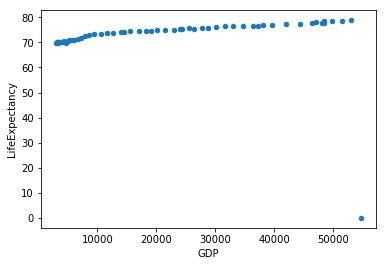

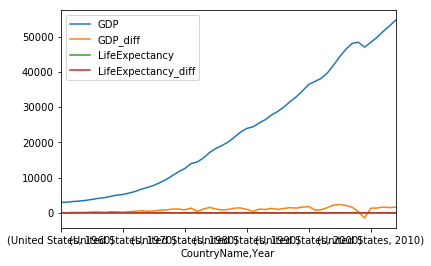

In [19]:
us_df.plot.scatter(x = 'GDP', y = 'LifeExpectancy')
us_df.plot()

### Linear regression with change in GDP as the  X variable

In [20]:
#determining linear regression
X = us_df[['GDP_diff']].iloc[:-1]
y = us_df['LifeExpectancy_diff'].iloc[1:]
lr = LinearRegression()
lr = lr.fit(X,y)
lr.score(X,y)

0.014640255033688042

### Linear regression with change in LifeExpectancy as the  X variable

In [21]:
#determining linear regression
X = us_df[['LifeExpectancy_diff']].iloc[:-1]
y = us_df['GDP_diff'].iloc[1:]
lr = LinearRegression()
lr = lr.fit(X,y)
lr.score(X,y)

3.619226264017783e-05

### Preliminary assessment
There is a pretty weak correlation (R^2 of 0.014 when GDP is X and ~0 when Life Expectancy is the independent variable). Is this correct?

--> This is really the machine learning section

### To do: 
Creating df for World 

As a next step need turn this into a function for any list of countries and indicators - which starts on ln 212

In [22]:
#Life Expectancy - World
le_world = df[(df.CountryName == 'World') & (df.IndicatorCode == 'SP.DYN.LE00.IN')]
le_world = le_world.pivot_table(values='Value', index=['CountryName','Year'], columns=['IndicatorName'])
le_world.head()

IndicatorName     Life expectancy at birth, total (years)
CountryName Year                                         
World       1960                                52.499842
            1961                                53.004380
            1962                                53.471810
            1963                                54.097448
            1964                                54.913004

In [23]:
#GDP for world
gdp_world = df[(df.IndicatorCode =='NY.GDP.PCAP.CD') & (df.CountryName =='World')]
gdp_world = gdp_world.pivot_table(values='Value', index=['CountryName', 'Year'], columns=['IndicatorName'])
gdp_world.head()

IndicatorName     GDP per capita (current US$)
CountryName Year                              
World       1960                    450.289472
            1961                    462.285277
            1962                    487.959281
            1963                    514.438304
            1964                    552.413459

In [24]:
# Combined data fram for world
world_df = pd.concat([gdp_world, gdp_world.diff(), le_world, le_world.diff()], axis=1)
world_df.columns = ['GDP', 'GDP_diff','LifeExpectancy', 'LifeExpectancy_diff']
world_df.head(2)

GDP   GDP_diff  LifeExpectancy  LifeExpectancy_diff
CountryName Year                                                            
World       1960  450.289472        NaN       52.499842                  NaN
            1961  462.285277  11.995806       53.004380             0.504538

### Creating dictionaries for specific indicators
Where the key is country and the values is a series with indicator values by year

The goal was so I could quickly replicate my work for each country - but putting down and first focusing on structuring my approach for one country

In [25]:
l_countries = list(set(df['CountryName']))  #list of unique country names
d_gdp = {}  # declare empty dictionary for gdp
d_le = {}  #empty dictionary for life expectancy

columns = ['CountryName','Year', 'Value']
df1 = pd.DataFrame(df, columns=columns)

In [26]:
#create a GDP series per country 
for i in l_countries: 
    x = df[(df.CountryName == i) & (df.IndicatorCode == 'NY.GDP.PCAP.CD')]  #gdp
    x = pd.DataFrame(x,columns=columns)
    x = x.reset_index()
    d_gdp[i] = x

In [27]:
#create a life expectancy series per country 
for i in l_countries: 
    x = df[(df.CountryName == i) & (df.IndicatorCode == 'SP.DYN.LE00.IN')]  #life expectancy
    x = pd.DataFrame(x,columns=columns)
    d_le[i] = x